# Übung 3

### Thema: Lineare Regression
In dieser Übung wollen wir uns damit befassen, wie Zusammenhänge zwischen Ein- und Ausgabegrößen mit Hilfe linearer Regressionsansätze modelliert werden. Für das Modelltraining wird der in der Vorlesung verwendete Least-Squares-Ansatz verwendet.

## Aufgabe 1 (Theorie-Aufgabe)

Gegeben seien die Wertepaare $$(x_1,y_1)=(-2,7),~(x_2,y_2)=(-1,2),~(x_3,y_3)=(0,1),~(x_4,y_4)=(1,2)~$$
Bestimmen Sie unter Verwendung des Least-Squares-Ansatzes Regressions-Polynome ersten, zweiten und dritten Grades für diese Daten. Skizzieren Sie anschließend die Graphen der Regressionspolynome in einem Koordinatensystem. Zeichnen Sie in dieses auch die gegebenen Punkte mit ein.

# This is a polynomial of order 1.
# This is a polynomial of order 2.
# This is a polynomial of order 3.


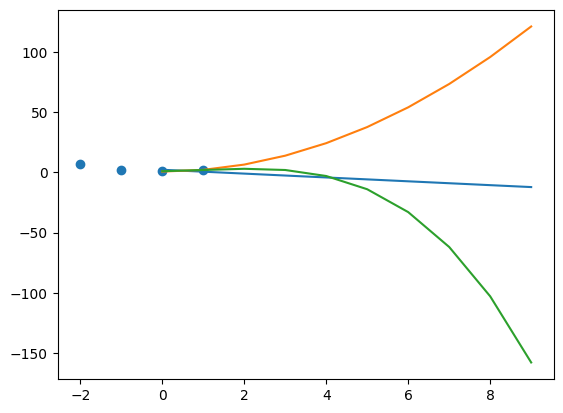

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {o-1}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y


points_x = [-2,-1,0,1]
points_y = [7,2,1,2]
x = np.linspace(0, 9, 10)

coeffs1 = [11/5,-8/5]
coeffs2 = [7/10,-1/10,3/2]
coeffs3 = [1, 1/3, 1, -1/3]

plt.plot(x, PolyCoefficients(x, coeffs1))
plt.plot(x, PolyCoefficients(x, coeffs2))
plt.plot(x, PolyCoefficients(x, coeffs3))

plt.scatter(points_x, points_y)
plt.show()

## Aufgabe 2 

In dieser Aufgabe soll ein Modell zur Vorhersage von Häuserpreisen basierend auf der Wohnfläche in Scikit-learn erstellt werden. Dazu soll der aus der Vorlesung bekannte Datensatz verwendet werden, der die Preise von 48 Häusern und deren Wohnflächen enthält.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Laden des Datensatzes

In [3]:
df = np.loadtxt("housing_prices.txt", dtype=np.float64, delimiter=",")
data_x = df[:,0]*0.3048**2 #Umrechnung Fuß in Quadratmeter
data_y = df[:,-1] #Enthält die Häuserpreise in Euro

#### a) Visualisierung

Visualisieren Sie die Daten, indem Sie ein Streudiagramm in matplotlib zeichnen. Versehen Sie das Diagramm mit Achsenbeschriftungen und mit einem Titel.

Text(0, 0.5, 'Preis in Euro')

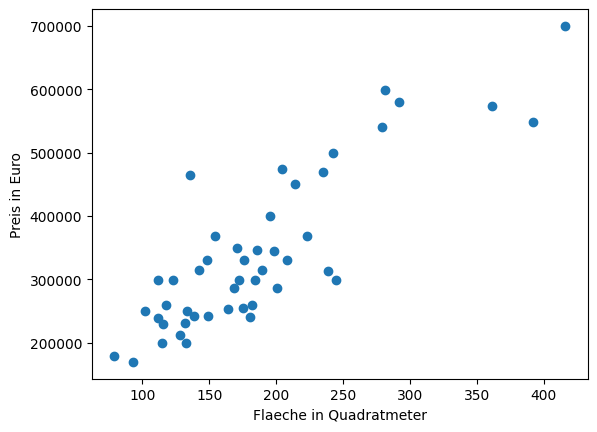

In [4]:
plt.scatter(data_x, data_y)
plt.xlabel('Flaeche in Quadratmeter')
plt.ylabel('Preis in Euro')

#### b) Berechnung des Korrelationskoeffizienten

Begründen Sie durch Berechnung des empirischen Korrelationskoeffizienten zwischen `data_x` und `data_y`, dass ein linearer Modellansatz gerechtfertigt erscheint, um den Zusammenhang zwischen der Wohnfläche und den Häuserpreisen zu beschreiben. <br>
Hinweis: Sie können dazu die Funktion `numpy.corrcoef` verwenden. Welche Werte kann man aus dem Ergebnis ablesen?

In [12]:
coeff = np.corrcoef(data_x, data_y)
print(coeff)

[[1.         0.85498759]
 [0.85498759 1.        ]]


data_x und data_y korrelieren stark positiv

#### c) Lineare Regression mit scikit-learn

Trainieren Sie auf dem gesamten Datensatz ein lineares Regressionsmodell in scikit-learn. Verwende Sie<br>
Hinweis: auf einen Train-Test-Split und eine anschließende Modellvalidierung wird hier vereinfachend/ausnahmsweise verzichtet. 

In [34]:
import statsmodels.api as sm

In [36]:
model = sm.OLS(data_y, data_x)
results = model.fit()

In [37]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1212.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):                    1.06e-34
Time:                        19:18:18   Log-Likelihood:                         -590.53
No. Observations:                  47   AIC:                                      1183.
Df Residuals:                      46   BIC:                                      1185.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### d) Modell-Output

Welche Werte haben die gefitteten Parameter $\theta_0$ und $\theta_1$?

In [38]:
print(f"regression coefficients: {results.params}")

regression coefficients: [1780.17014186]


#### e) Visualisierung des Modells

Erstellen Sie das Streudiagramm aus a) erneut und zeichnen Sie nun auch die Regressionsgerade mit ein.

Text(0, 0.5, 'Preis in Euro')

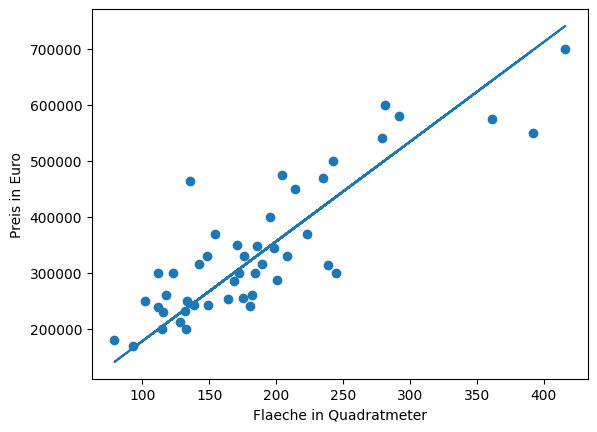

In [42]:
plt.scatter(data_x, data_y)
coeffs4 = results.params
plt.plot(data_x, results.predict(data_x))
plt.xlabel('Flaeche in Quadratmeter')
plt.ylabel('Preis in Euro')

#### e) Einsatz des Modells zur Prognose

Welchen Hauspreis prognostiziert das Modell für ein Haus mit $100m^2$ Wohnfläche?

In [43]:
results.predict(100)

array([178017.01418586])

#### f) Standardisierung

Wiederholen Sie das Modelltraining und standardisieren Sie nun vorher den Datensatz. Vergleichen Sie die Werte 

In [48]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_x = scale.fit_transform(data_x) 
scaled_y = scale.fit_transform(data_y) 

In [51]:
model = sm.OLS(scaled_y, scaled_x)
results = model.fit()

In [52]:
print(f"regression coefficients: {results.params}")

regression coefficients: [0.85498759]


Text(0, 0.5, 'Preis in Euro')

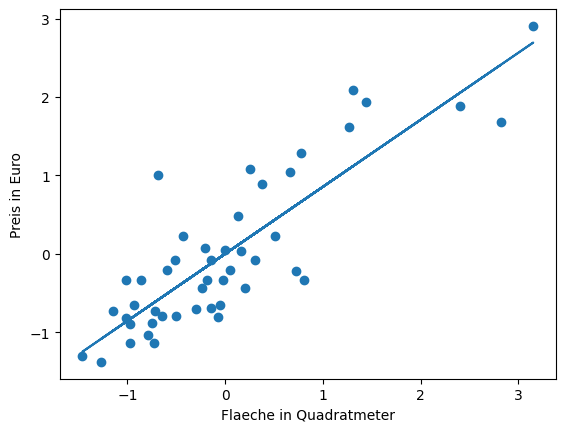

In [55]:
plt.scatter(scaled_x, scaled_y)
coeffs4 = results.params
plt.plot(scaled_x, results.predict(scaled_x))
plt.xlabel('Flaeche in Quadratmeter')
plt.ylabel('Preis in Euro')

## Aufgabe 3

In dieser Aufgabe sollen die ermittelten Regressionskoeffizienten $\theta_0$ und $\theta_1$ durch Lösen der Normalgleichungen (vgl. Aufgabe 1) unter Verwendung von NumPy-Funktionen berechnet werden.

In [73]:
#for P1
X = np.array([[1,-2],
              [1, -1],
              [1,0],
              [1, 1]])
y = np.array([7,2,1,2])
np.matmul(a, b)
#Formula: XtXO = Xty
left = np.matmul(X.transpose(), X)
right = np.matmul(X.transpose(),y)

res1 = np.linalg.solve(left,right)
res1


array([ 2.2, -1.6])

In [74]:
#for P3
X = np.array([[1, -2, 4, -8],
              [1, -1, 1, -1],
              [1, 0, 0, 0],
              [1, 1, 1, 1]])
y = np.array([7,2,1,2])
np.matmul(a, b)
#Formula: XtXO = Xty
left = np.matmul(X.transpose(), X)
right = np.matmul(X.transpose(),y)

res3 = np.linalg.solve(left,right)
res3

array([ 1.        ,  0.33333333,  1.        , -0.33333333])

# This is a polynomial of order 3.


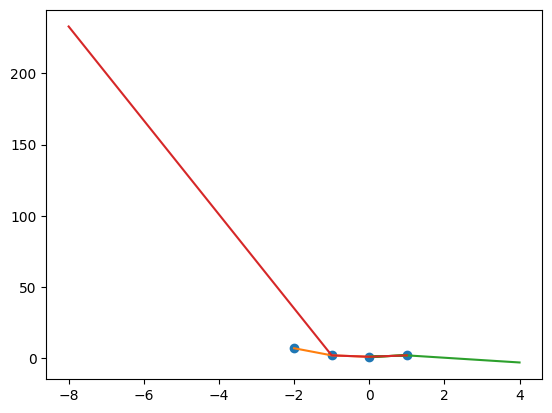

In [118]:
#for P3 polynomial:
X_points = X[:, 1]
plt.plot(X, PolyCoefficients(X, res3))
plt.scatter(X_points, y)

<h2>Now for the Housing Market</h2>

In [119]:
data_x_matrix = np.c_[np.ones(len(data_x)), scaled_x  ]   
data_x_matrix
#Formula: XtXO = Xty
left = np.matmul(data_x_matrix.transpose(), data_x_matrix)
right = np.matmul(data_x_matrix.transpose(),scaled_y)

res4 = np.linalg.solve(left,right)
res4

array([[-4.22966310e-16],
       [ 8.54987593e-01]])

# This is a polynomial of order 1.


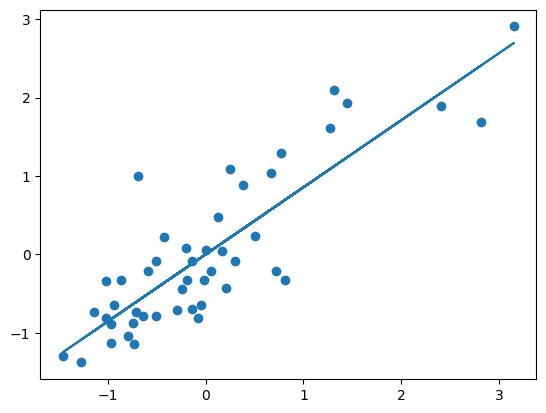

In [120]:
plt.plot(scaled_x, PolyCoefficients(scaled_x, res4))
plt.scatter(scaled_x, scaled_y)